[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv10 Object Detection on a Custom Dataset

---

[![arXiv](https://img.shields.io/badge/arXiv-2405.14458-b31b1b.svg)](https://arxiv.org/pdf/2405.14458.pdf)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/THU-MIG/yolov10)
[![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/SkalskiP/YOLO-ARENA)

YOLOv10 is a new generation in the YOLO series for real-time end-to-end object detection. It aims to improve both the performance and efficiency of YOLOs by eliminating the need for non-maximum suppression (NMS) and optimizing model architecture comprehensively. This advancement reduces computational overhead, enhancing both efficiency and capability. YOLOv10 shows state-of-the-art performance and efficiency, with YOLOv10-S being 1.8 times faster than RT-DETR-R18 and having significantly fewer parameters and FLOPs. Additionally, YOLOv10-B demonstrates 46% less latency and 25% fewer parameters compared to YOLOv9-C while maintaining the same performance.

<p align="center">
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_latency.svg" width=48%>
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_params.svg" width=48%> <br>
  Comparisons with others in terms of latency-accuracy (left) and size-accuracy (right) trade-offs.
</p>

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv10
- Download pre-trained weights
- Download example data
- Inference with Pre-trained COCO Model
- Download dataset from Roboflow Universe
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Nov  6 17:18:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv10

**NOTE:** Currently, YOLOv10 does not have its own PyPI package. Therefore, we need to install the code from the source.

In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**NOTE:** We will also install two additional packages: [`roboflow`](https://github.com/roboflow/roboflow-python) to download the dataset from [Roboflow Universe](https://universe.roboflow.com/), which we will use to train our model, and [`supervision`](https://github.com/roboflow/supervision), which we will use for visualizing the results.

In [4]:
!pip install -q supervision roboflow

## Download pre-trained weights

**NOTE:** YOLOv10 provides weight files pre-trained on the COCO dataset in various sizes. Let's download them.

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 815M
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt
-rw-r--r-- 1 root root  80M May 26  2024 yolov10b.pt.1
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt
-rw-r--r-- 1 root root 100M May 26  2024 yolov10l.pt.1
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt
-rw-r--r-- 1 root root  64M May 26  2024 yolov10m.pt.1
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt
-rw-r--r-- 1 root root  11M May 26  2024 yolov10n.pt.1
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt
-rw-r--r-- 1 root root  32M May 26  2024 yolov10s.pt.1
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt
-rw-r--r-- 1 root root 123M May 26  2024 yolov10x.pt.1


## Download example data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [ ]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!ls -lh {HOME}/data

total 208K
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg.1


## Inference with Pre-trained COCO Model

**NOTE:** YOLOv10 is based on YOLOv8, and like YOLOv8, it can be used in both CLI and SDK modes.

### 💻 CLI

In [ ]:
%cd {HOME}

!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={HOME}/data/dog.jpeg

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    model = YOLOv10(model)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/models/yolov10/model.py", line 14, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 141, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/nn/tasks.py", line 807, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
         

**NONE:** Let's display result.

In [ ]:
%cd {HOME}

from IPython.display import Image

Image(filename='runs/detect/predict/dog.jpeg', height=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict/dog.jpeg'

### 🐍 Python SDK

In [ ]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/data/dog.jpeg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

**NONE:** Let's display result using `supervision`.

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/dog.jpeg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

## Download dataset from Roboflow Universe

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="47S0YeXTshdLECIo1uPG")
project = rf.workspace("o-njztx").project("tikus-0uv1i")
version = project.version(9)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


**NOTE:**
Make sure the last 4 lines of the data.yaml file have the following format:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

If using a dataset from Roboflow, run the command below. 👇🏻

In [7]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [8]:
pip install -U ultralytics

  Using cached ultralytics-8.3.225-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.225-py3-none-any.whl (1.1 MB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


## Custom Training

In [ ]:
!yolo task=detect mode=train epochs=30 batch=28 imgsz=416 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml \
project={HOME}/datasets/runs/detect name=train_yolov10n

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=28, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/tikus-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/weights/yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

In [9]:
!yolo task=detect mode=train epochs=30 batch=28 imgsz=416 plots=True \
model={HOME}/weights/yolov10m.pt \
data={dataset.location}/data.yaml

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=28, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/tikus-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/weights/yolov10m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

In [11]:
!ls {HOME}/datasets/runs/detect/train/

args.yaml  weights


/content


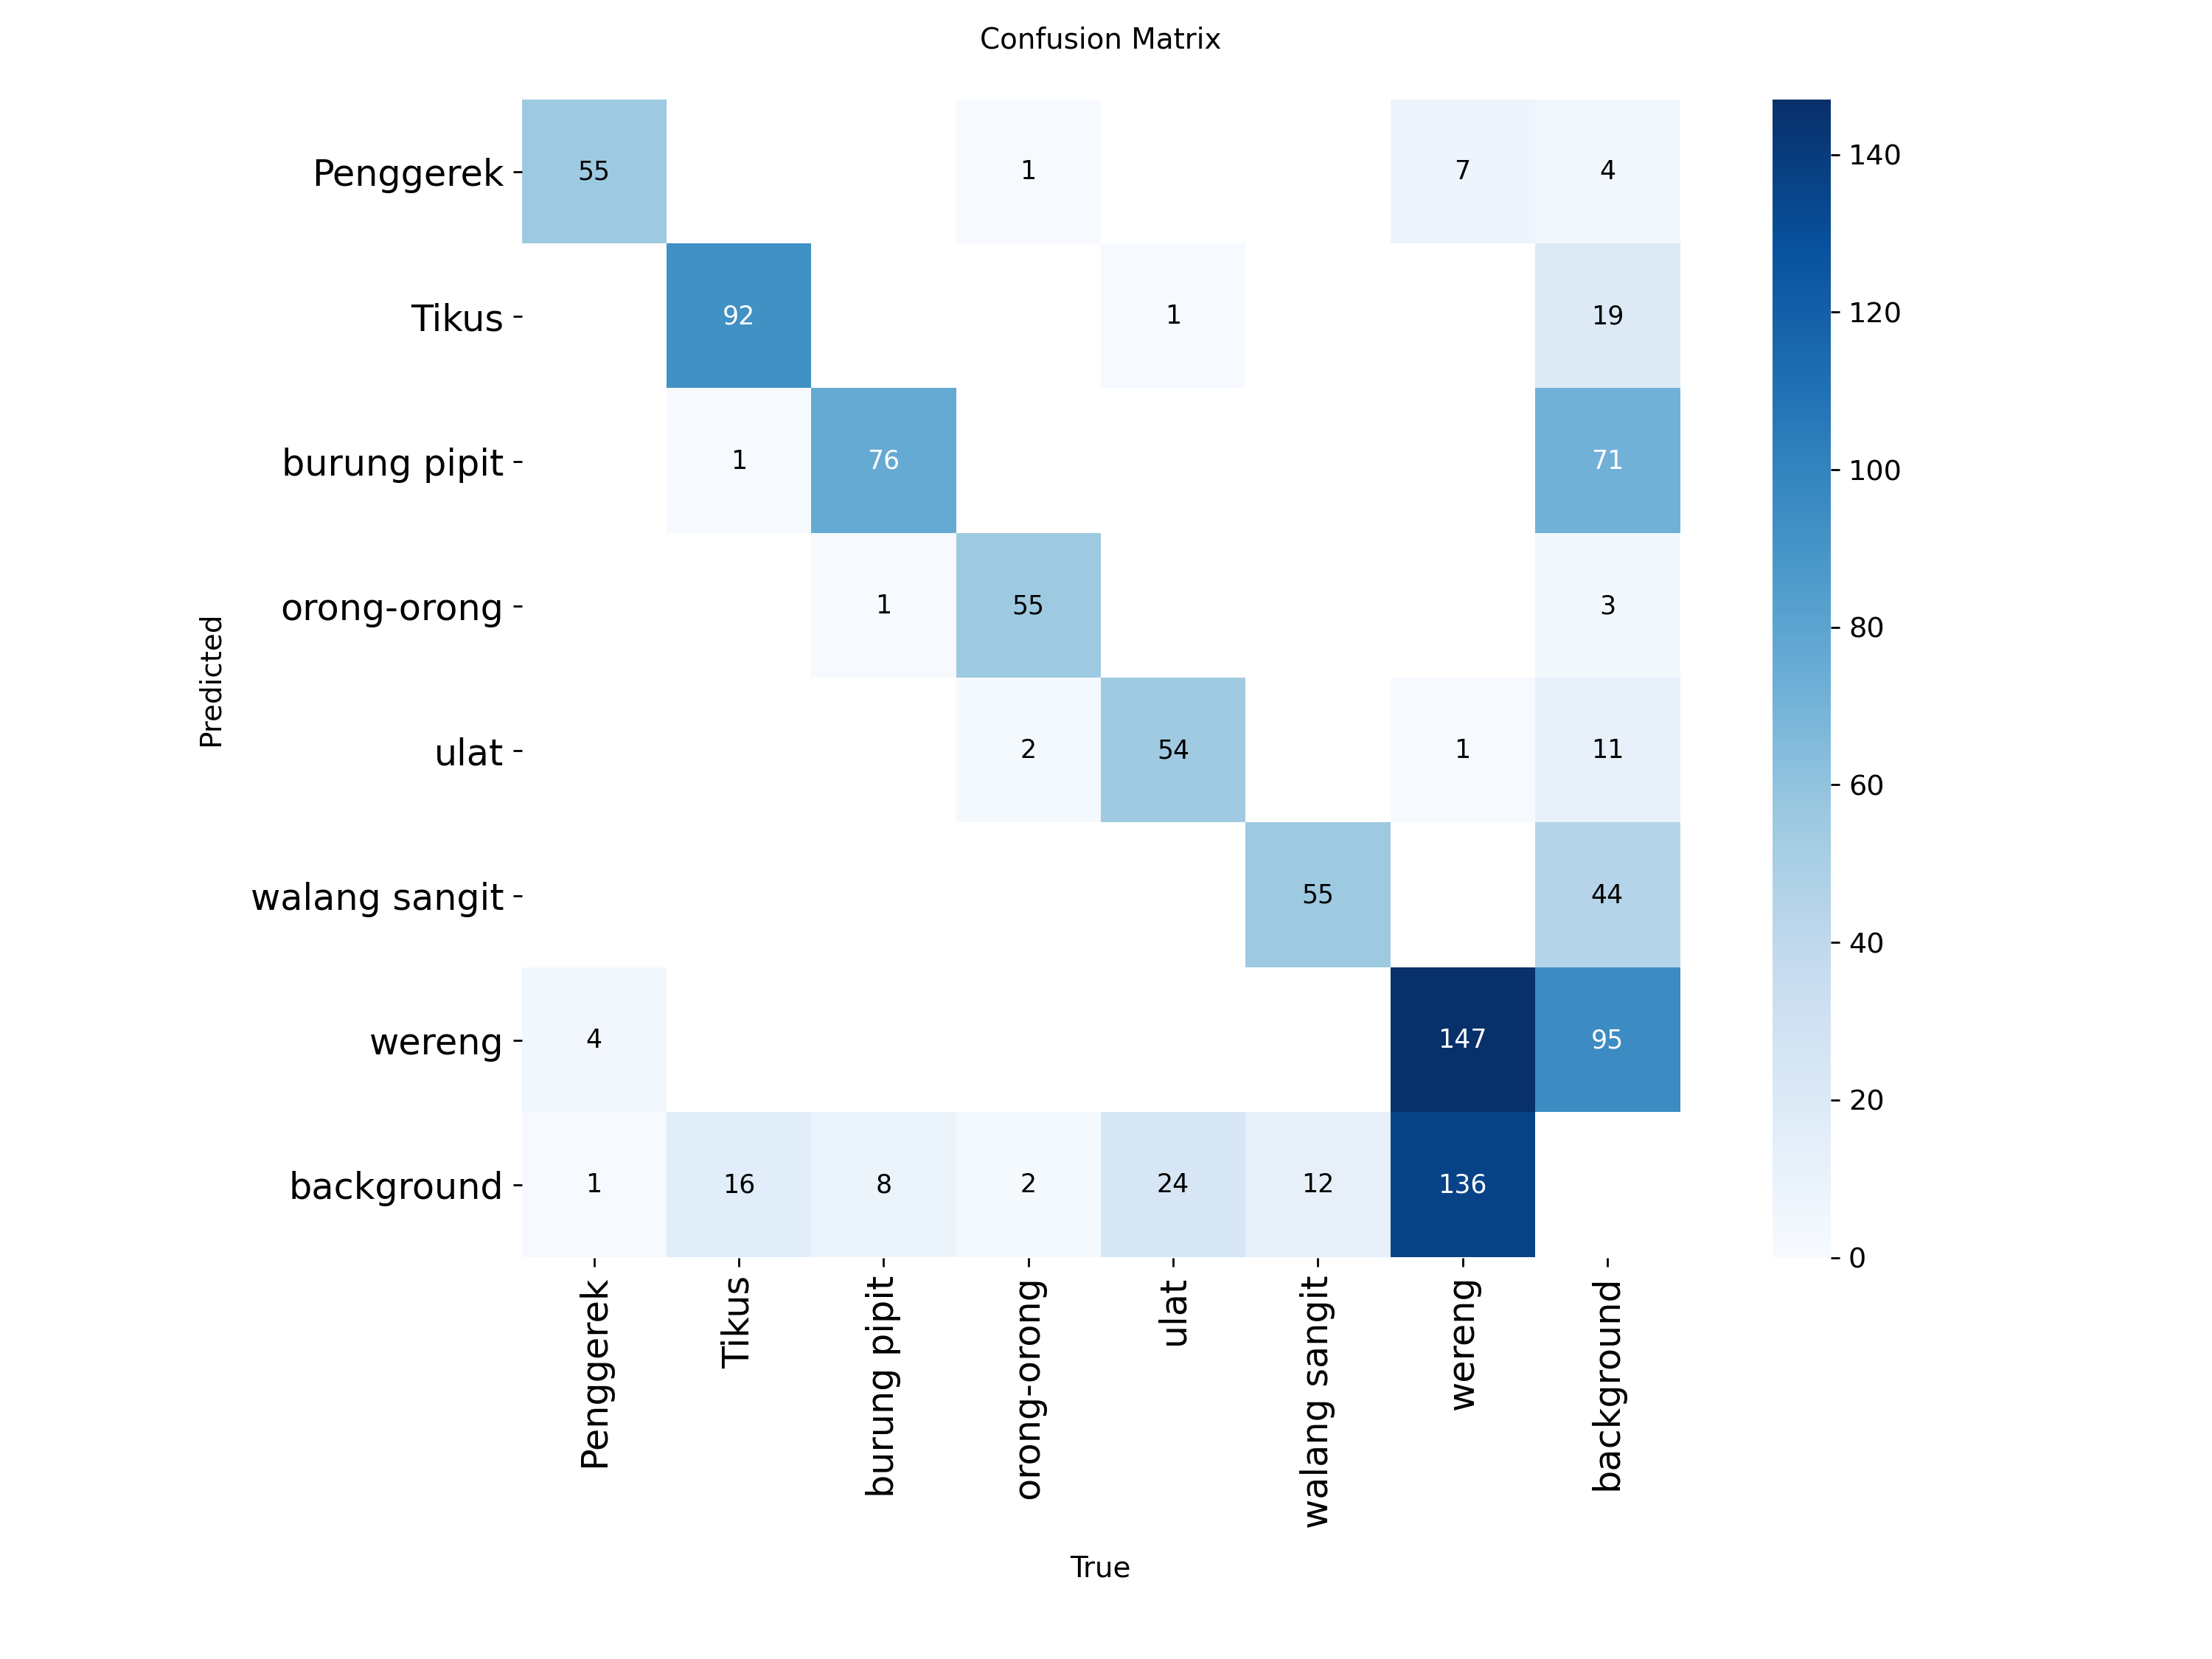

In [14]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train2/confusion_matrix.png', width=600)

### Visualize Ground Truth and Predictions Together

Let's pick a random image from the validation set and visualize both the ground truth annotations and the model's predictions on it. Ground truth boxes will be shown in **green**, and predictions will be in **red**.


0: 416x416 1 walang sangit, 21.8ms
Speed: 1.3ms preprocess, 21.8ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 416)
Displaying Ground Truth (Green) and Predictions (Red) for image: /content/tikus-9/valid/images/download_jpg.rf.78a42b6831a0a93cec2f2fbc7c10ae5c.jpg


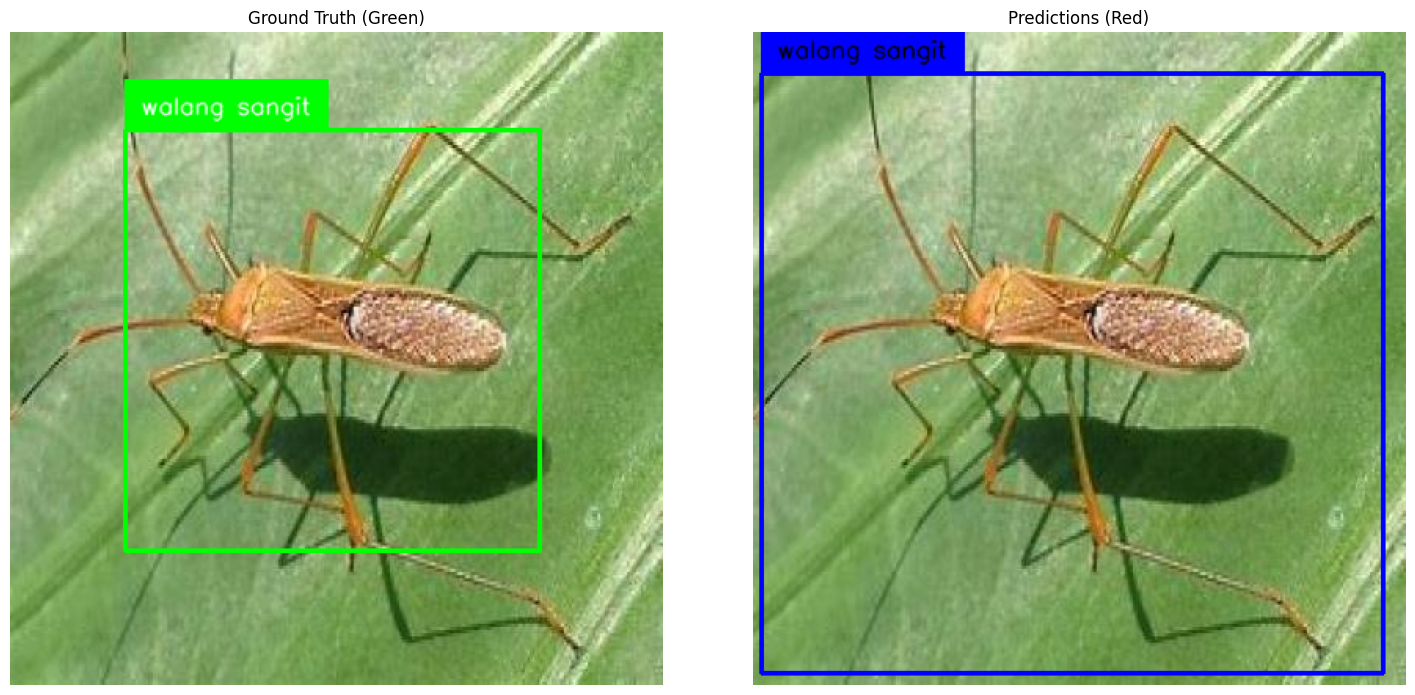

In [52]:
import random
import cv2
import supervision as sv
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Define annotators with different colors for ground truth and predictions
gt_box_annotator = sv.BoxAnnotator(color=sv.Color(0, 255, 0)) # Green for Ground Truth
gt_label_annotator = sv.LabelAnnotator(color=sv.Color(0, 255, 0), text_color=sv.Color(255, 255, 255)) # Green with white text

pred_box_annotator = sv.BoxAnnotator(color=sv.Color(255, 0, 0)) # Red for Predictions
pred_label_annotator = sv.LabelAnnotator(color=sv.Color(255, 0, 0), text_color=sv.Color(0, 0, 0)) # Red with black text

# Get a random image key from the validation dataset
all_image_keys = list(sv_dataset.annotations.keys())
random_image_key = random.choice(all_image_keys)

# Load the image manually using OpenCV
image = cv2.imread(random_image_key)

# Check if image loaded successfully
if image is None:
    print(f"Warning: Could not load image from {random_image_key}. Skipping visualization.")
else:
    # OpenCV loads images in BGR format, convert to RGB for consistency
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get ground truth detections for the image
    ground_truth_detections = sv_dataset.annotations[random_image_key]

    # Generate labels for ground truth detections
    gt_labels = [
        sv_dataset.classes[class_id]
        for class_id in ground_truth_detections.class_id
    ]

    # Perform inference to get model predictions
    results = model(source=image_rgb, conf=0.25)[0]
    predictions = sv.Detections.from_ultralytics(results)

    # Generate labels for predictions
    pred_labels = [
        model.model.names[class_id]
        for class_id in predictions.class_id
    ]

    # Annotate image with ONLY ground truth
    ground_truth_only_image = gt_box_annotator.annotate(
        scene=image_rgb.copy(), detections=ground_truth_detections)
    ground_truth_only_image = gt_label_annotator.annotate(
        scene=ground_truth_only_image, detections=ground_truth_detections, labels=gt_labels)

    # Annotate image with ONLY predictions
    predictions_only_image = pred_box_annotator.annotate(
        scene=image_rgb.copy(), detections=predictions)
    predictions_only_image = pred_label_annotator.annotate(
        scene=predictions_only_image, detections=predictions, labels=pred_labels)

    print(f"Displaying Ground Truth (Green) and Predictions (Red) for image: {random_image_key}")

    # Display both images side-by-side using matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    axes[0].imshow(ground_truth_only_image)
    axes[0].set_title("Ground Truth (Green)")
    axes[0].axis('off')

    axes[1].imshow(predictions_only_image)
    axes[1].set_title("Predictions (Red)")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


/content


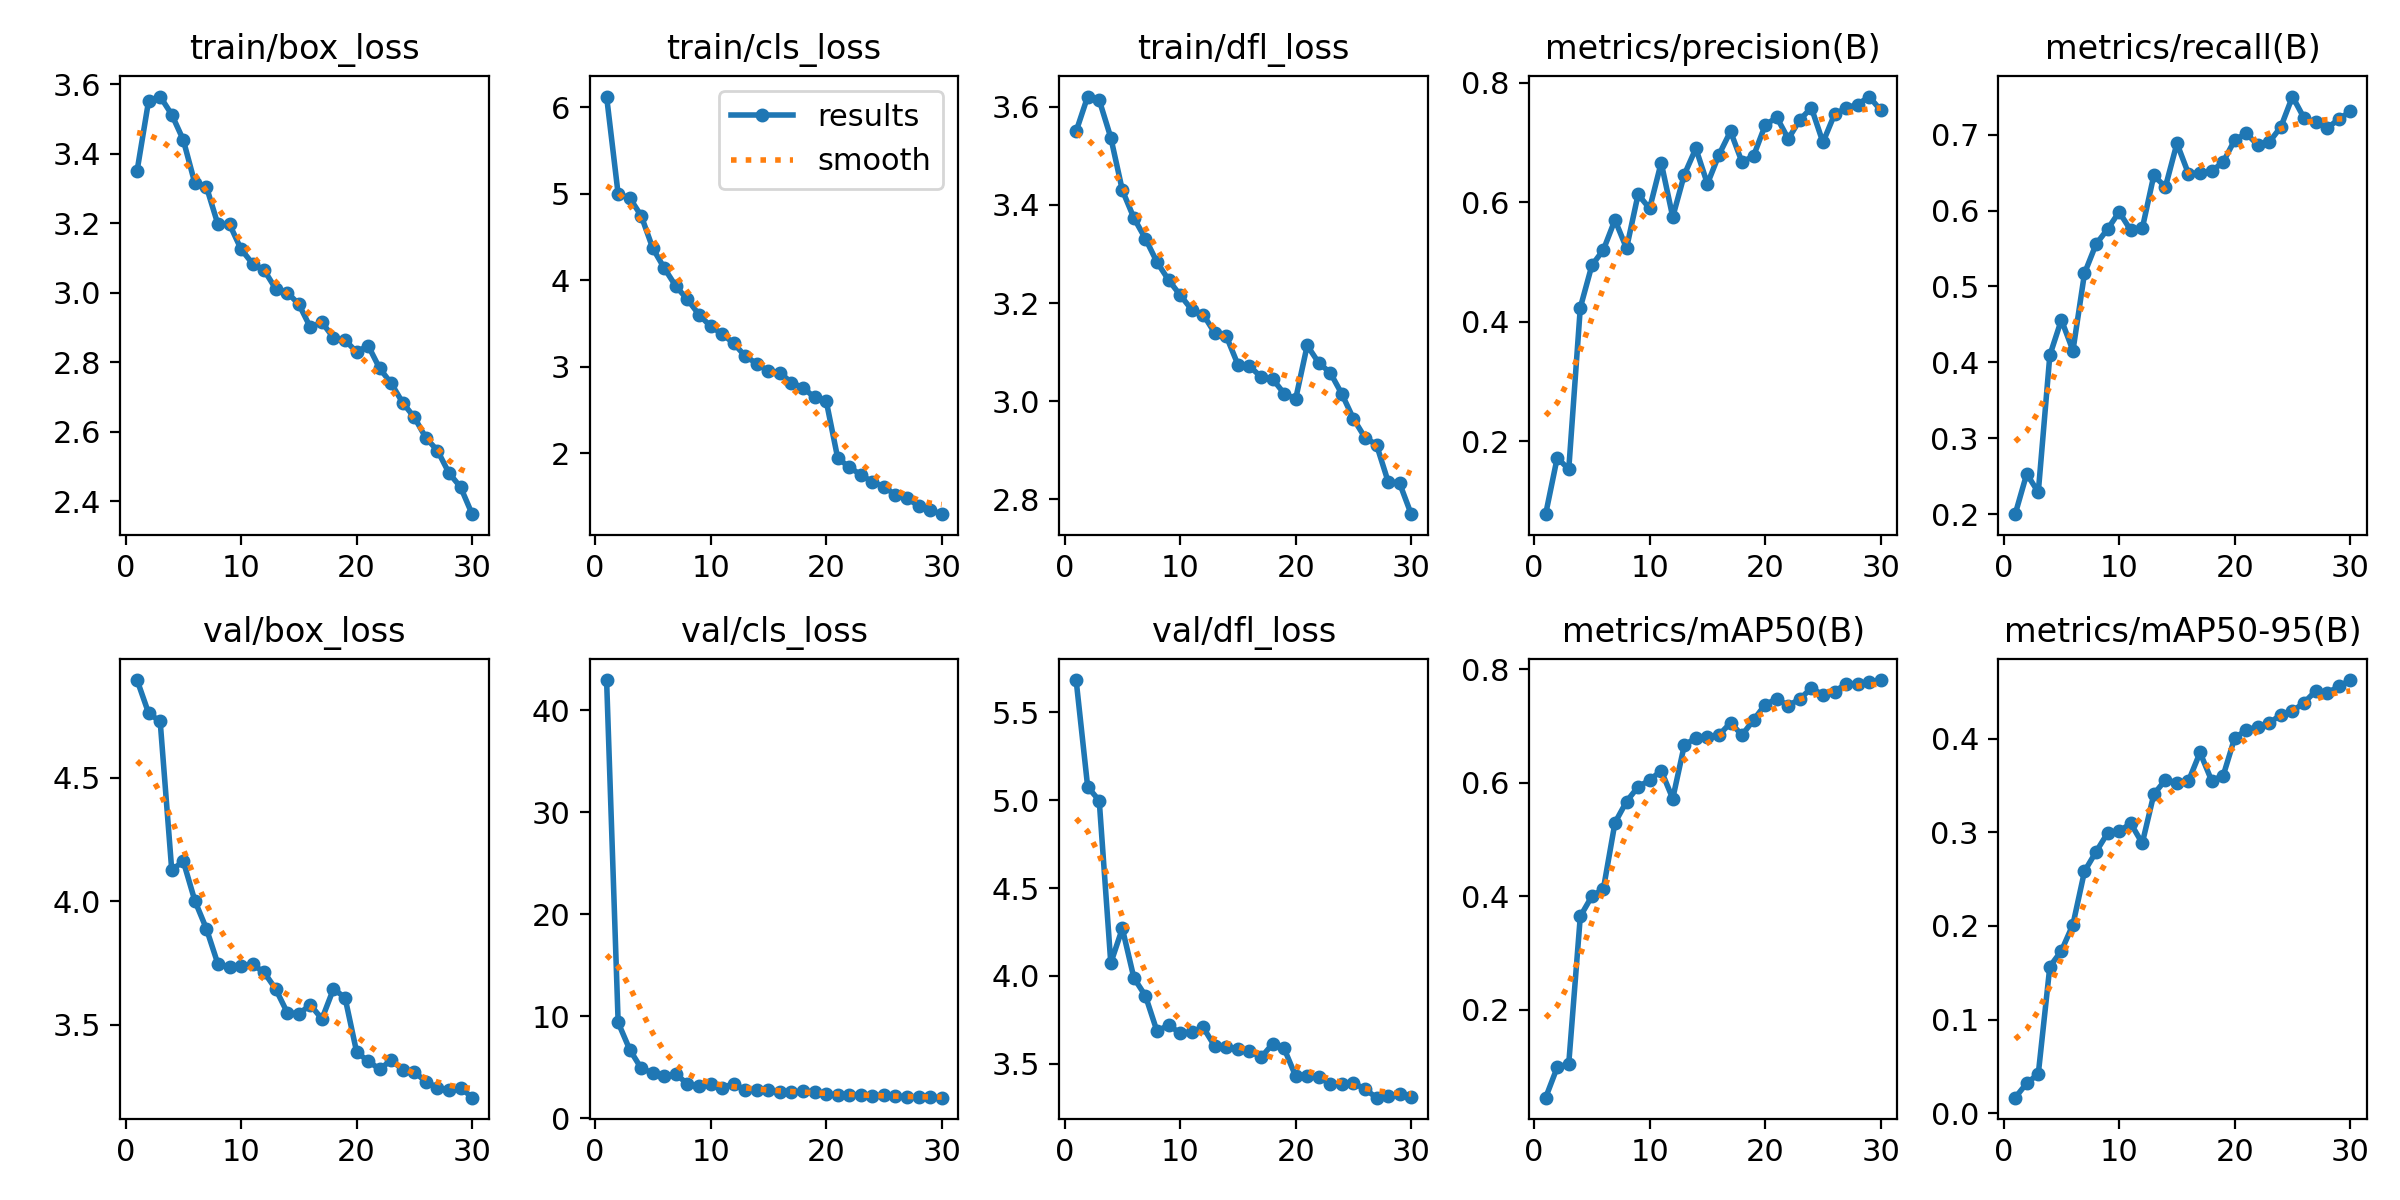

In [15]:
from IPython.display import Image
%cd {HOME} burung-104-_jpg.rf.bfc9014eb7d89a37e20ed190b246e482.jpg download_jpg.rf.78a42b6831a0a93cec2f2fbc7c10ae5c.jpg
Image(filename=f'{HOME}/datasets/runs/detect/train2/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [53]:
from ultralytics import YOLO
import supervision as sv

# Loading the yolov10n model weights from the 'train4' run
model = YOLO(f'{HOME}/runs/detect/train4/weights/best.pt')

# Re-download the Roboflow dataset to ensure we have the correct object
# The 'version' variable is from a previous cell and holds the Roboflow project version.
rf_dataset_object = version.download("yolov8")
rf_dataset_path = rf_dataset_object.location

sv_dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{rf_dataset_path}/valid/images",
    annotations_directory_path=f"{rf_dataset_path}/valid/labels",
    data_yaml_path=f"{rf_dataset_path}/data.yaml"
)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train4/weights/best.pt'

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


0: 416x416 2 burung pipits, 18.9ms
Speed: 2.2ms preprocess, 18.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Displaying predictions for image: /content/tikus-9/valid/images/burung-242-_jpg.rf.fcfe9d1056206bf0616f1ff3525233e5.jpg


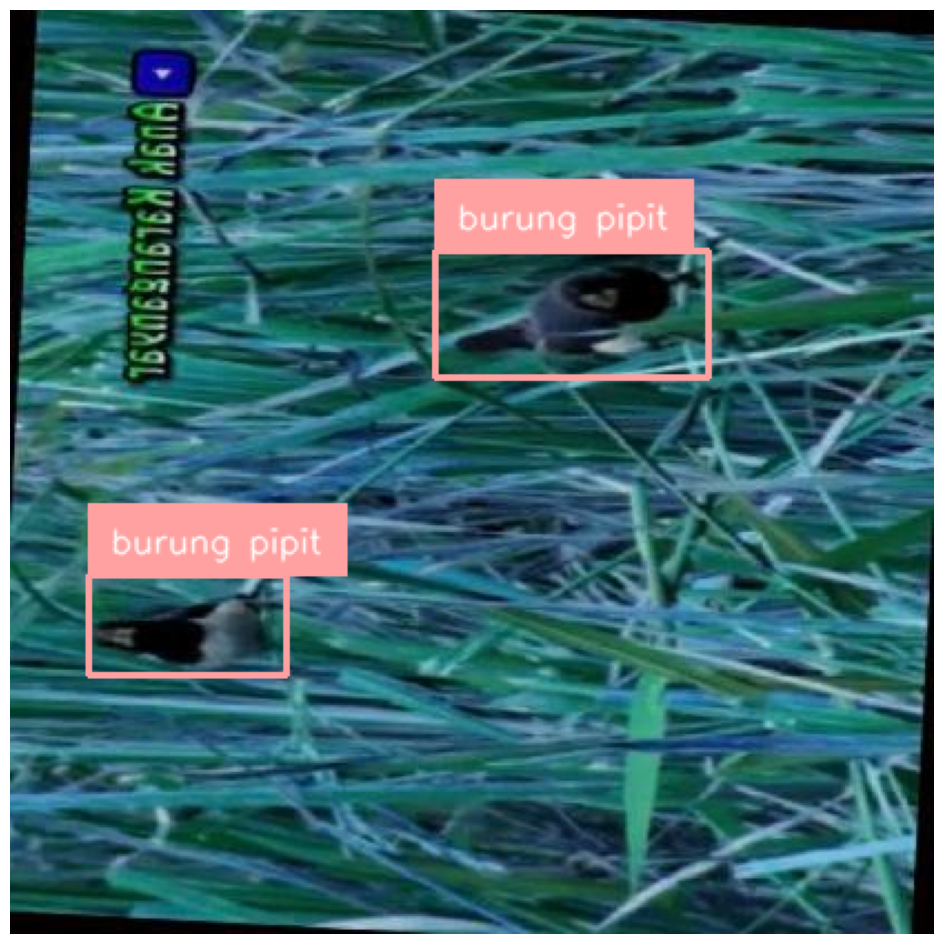


0: 416x416 1 walang sangit, 18.9ms
Speed: 1.3ms preprocess, 18.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)
Displaying predictions for image: /content/tikus-9/valid/images/Screenshot-2024-02-21-220219_png.rf.189f83cf23272617090fe043ad4bb211.jpg


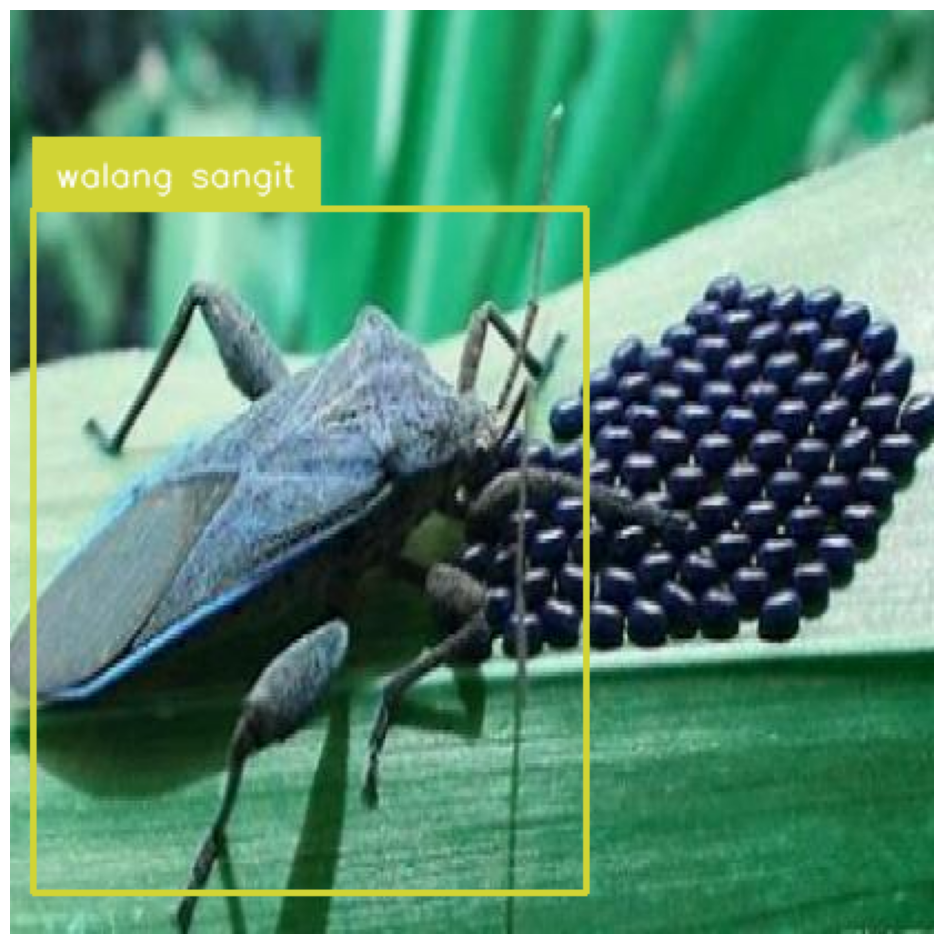


0: 416x416 (no detections), 19.4ms
Speed: 1.3ms preprocess, 19.4ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)
Displaying predictions for image: /content/tikus-9/valid/images/burung-131-_jpg.rf.326ddfcbd89d99cc678577eee6b203c8.jpg


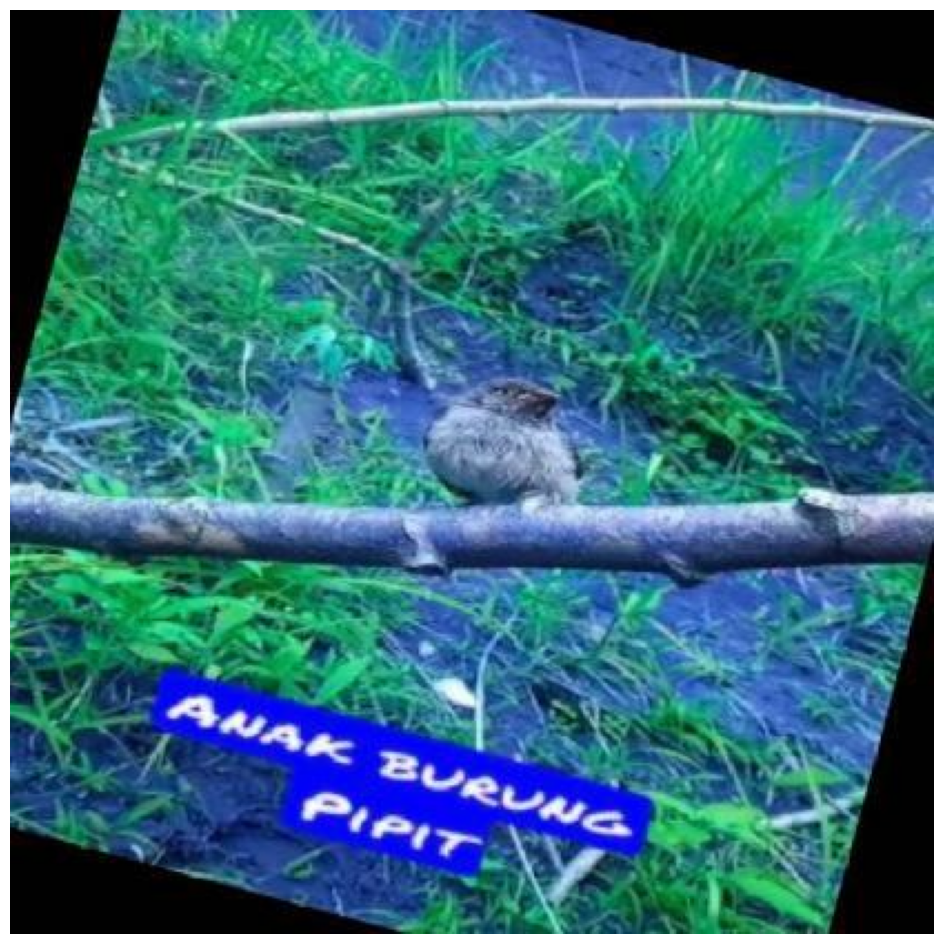

In [29]:
import random
import cv2
import supervision as sv
from ultralytics import YOLO

# Get the list of image keys from the sv.DetectionDataset object
all_image_keys = list(sv_dataset.annotations.keys())

# Select 3 random image keys
random_images_keys = random.sample(all_image_keys, min(3, len(all_image_keys)))

# Annotators are already defined in the previous cell, no need to redefine

for image_key in random_images_keys:
    # Load the image manually using OpenCV as sv_dataset.load_image is not available
    random_image = cv2.imread(image_key)

    # Check if image loaded successfully
    if random_image is None:
        print(f"Warning: Could not load image from {image_key}. Skipping.")
        continue

    # OpenCV loads images in BGR format, convert to RGB for consistency with other libraries if needed
    random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(source=random_image, conf=0.25)[0]
    detections = sv.Detections.from_ultralytics(results)

    annotated_image = bounding_box_annotator.annotate(
        scene=random_image.copy(), detections=detections) # Use .copy() to prevent modifying original image in place
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

    print(f"Displaying predictions for image: {image_key}")
    sv.plot_image(annotated_image)

## Deploy model on Roboflow

Once you have finished training your YOLOv10 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov10", model_path=f"{HOME}/runs/detect/train/")

While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference